In [1]:
import pandas as pd       
import numpy as np       

In [2]:
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import datetime as dt

In [4]:
import warnings; warnings.simplefilter('ignore')

# Importing the DataSet

In [6]:
yellow_cab_data =pd.read_csv("yellow_tripdata_2021-01.csv")
print(yellow_cab_data)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2             1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3             1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4             2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   
...           ...                  ...                   ...              ...   
1369760       NaN  2021-01-25 08:32:04   2021-01-25 08:49:32              NaN   
1369761       NaN  2021-01-25 08:34:00   2021-01-25 09:04:00              NaN   
1369762       NaN  2021-01-25 08:37:00   2021-01-25 08:53:00              NaN   
1369763       NaN  2021-01-25 08:28:00   2021-01-25 08:50:00              NaN   
1369764       NaN  2021-01-25 08:38:00   2021-01-25 08:50:00              NaN   

         trip_distance  Rat

The data we obtained is from https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page for year Jan 2021 and will be working with yellow cab data for timing.

The csv file is importing using pandas library and stored in yellow_cab_data variable 

# Exploring the Dataset

In [7]:
yellow_cab_data.shape

(1369765, 18)

After shaping the dataset we figured out that there are 1369765 rows and 18 columns in the dataset 

In [8]:
yellow_cab_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge'],
      dtype='object')

In [9]:
yellow_cab_data.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

Above are the columns and their data types mentioned in the csv

1. We have VendorID, passenger_count, trip_distance, RatecodeID, payment_type, fare_amount, extra, mta_tax, mta_tax, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge as float64
2. We have tpep_pickup_datetime and tpep_dropoff_datetime as object 
3. We have PULocationID and DOLocationID as int64

Lets take a view of first 10 data with columns

In [13]:
yellow_cab_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5


This data dictionary describes yellow taxi trip data. For a dictionary describing green taxi data, or a map
of the TLC Taxi Zones, please visit http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml. 

1. VendorID - A code indicating the TPEP provider that provided the record.
    1= Creative Mobile Technologies, LLC; 
    2= VeriFone Inc.
2. tpep_pickup_datetime - The date and time when the meter was engaged.
3. tpep_dropoff_datetime - The date and time when the meter was disengaged. 
4. Passenger_count  - The number of passengers in the vehicle. This is a driver-entered value.
5. Trip_distance - The elapsed trip distance in miles reported by the taximeter.
6. PULocationID TLC Taxi Zone in which the taximeter was engaged.
7. DOLocationID TLC Taxi Zone in which the taximeter was disengaged.
8. RateCodeID - The final rate code in effect at the end of the trip. 
    1= Standard rate 
    2=JFK 
    3=Newark 
    4=Nassau or Westchester 
    5=Negotiated fare 6=Group ride
9. Store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. 
    Y= store and forward trip 
    N= not a store and forward trip
10. Payment_type - A numeric code signifying how the passenger paid for the trip. 
    1= Credit card 
    2= Cash 
    3= No charge 
    4= Dispute 
    5= Unknown 
    6= Voided trip 
11. Fare_amount - The time-and-distance fare calculated by the meter.
12. Extra - Miscellaneous extras and surcharges. Currently, this only includes the dollar 0.50 and dollar 1 rush hour and overnight charges. 
13. MTA_tax - dollar 0.50 MTA tax that is automatically triggered based on the metered rate in use. 
14. Improvement_surcharge - dollar 0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. 
15. Tip_amount - Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.
16. Tolls_amount - Total amount of all tolls paid in trip.
17. Total_amount - The total amount charged to passengers. Does not include cash tips.


Since our goal is to identify trip duration and the parameter associated with it we need to first create a column name trip_duration

Idenitfying the column to find trip duration
trip_duration — duration of the trip in seconds

In [16]:
yellow_cab_data["pickuptime"] = pd.to_datetime(yellow_cab_data["tpep_pickup_datetime"])
print(yellow_cab_data["pickuptime"])
yellow_cab_data["droptime"] = pd.to_datetime(yellow_cab_data["tpep_dropoff_datetime"])
print(yellow_cab_data["droptime"])
print(yellow_cab_data)

0         2021-01-01 00:30:10
1         2021-01-01 00:51:20
2         2021-01-01 00:43:30
3         2021-01-01 00:15:48
4         2021-01-01 00:31:49
                  ...        
1369760   2021-01-25 08:32:04
1369761   2021-01-25 08:34:00
1369762   2021-01-25 08:37:00
1369763   2021-01-25 08:28:00
1369764   2021-01-25 08:38:00
Name: pickuptime, Length: 1369765, dtype: datetime64[ns]
0         2021-01-01 00:36:12
1         2021-01-01 00:52:19
2         2021-01-01 01:11:06
3         2021-01-01 00:31:01
4         2021-01-01 00:48:21
                  ...        
1369760   2021-01-25 08:49:32
1369761   2021-01-25 09:04:00
1369762   2021-01-25 08:53:00
1369763   2021-01-25 08:50:00
1369764   2021-01-25 08:50:00
Name: droptime, Length: 1369765, dtype: datetime64[ns]
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19      

In [18]:
yellow_cab_data["trip_duration"] = yellow_cab_data["droptime"] - yellow_cab_data["pickuptime"]
print(yellow_cab_data)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2             1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3             1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4             2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   
...           ...                  ...                   ...              ...   
1369760       NaN  2021-01-25 08:32:04   2021-01-25 08:49:32              NaN   
1369761       NaN  2021-01-25 08:34:00   2021-01-25 09:04:00              NaN   
1369762       NaN  2021-01-25 08:37:00   2021-01-25 08:53:00              NaN   
1369763       NaN  2021-01-25 08:28:00   2021-01-25 08:50:00              NaN   
1369764       NaN  2021-01-25 08:38:00   2021-01-25 08:50:00              NaN   

         trip_distance  Rat

Some observations about the data:

1. The columns id and vendor_id are nominal.
2. For better analysis, the columns pickuptime and droptime are kept as    objects that must be transformed to datetime.
3. The column store_and_fwd_flag is categorical

Numerical values in data 

In [21]:
yellow_cab_data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,difference_in_time,trip_duration
count,1.271413e+06,1.271413e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.271413e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1.369765e+06,1369765,1369765
mean,1.676925e+00,1.411508e+00,4.631982e+00,1.035081e+00,1.652472e+02,1.614956e+02,1.280521e+00,1.209662e+01,9.705085e-01,4.930411e-01,1.918099e+00,2.477432e-01,2.969412e-01,1.747439e+01,2.116098e+00,0 days 00:13:54.700953813,0 days 00:13:54.700953813
std,4.676513e-01,1.059833e+00,3.939042e+02,5.994840e-01,6.783849e+01,7.210800e+01,4.916921e-01,1.291338e+01,1.231256e+00,7.632070e-02,2.597153e+00,1.672755e+00,4.222174e-02,1.469343e+01,9.287277e-01,0 days 02:11:12.047950786,0 days 02:11:12.047950786
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,-94 days +04:35:22,-94 days +04:35:22
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.240000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.080000e+01,2.500000e+00,0 days 00:05:34,0 days 00:05:34
50%,2.000000e+00,1.000000e+00,1.700000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.500000e+00,0.000000e+00,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.380000e+01,2.500000e+00,0 days 00:09:04,0 days 00:09:04
75%,2.000000e+00,1.000000e+00,3.020000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.750000e+00,0.000000e+00,3.000000e-01,1.912000e+01,2.500000e+00,0 days 00:14:37,0 days 00:14:37
max,2.000000e+00,8.000000e+00,2.631633e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,8.250000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,20 days 00:17:42,20 days 00:17:42


Identifying null values and replacing with NA or Null or 0

In [28]:
yellow_cab_data.isnull().sum()

VendorID                 98352
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          98352
trip_distance                0
RatecodeID               98352
store_and_fwd_flag       98352
PULocationID                 0
DOLocationID                 0
payment_type             98352
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
pickuptime                   0
droptime                     0
difference_in_time           0
trip_duration                0
dtype: int64

In [24]:
data_yellow_cab = yellow_cab_data.dropna()

Since the data consist of null values we are cleaned the data as below

In [25]:
data_yellow_cab.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
pickuptime               0
droptime                 0
difference_in_time       0
trip_duration            0
dtype: int64

In [26]:
data_yellow_cab.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,difference_in_time,trip_duration
count,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1271413,1271413
mean,1.676925e+00,1.411508e+00,2.695507e+00,1.035081e+00,1.663164e+02,1.635025e+02,1.280521e+00,1.101425e+01,9.828323e-01,4.928536e-01,1.939242e+00,1.786589e-01,2.967077e-01,1.642607e+01,2.239046e+00,0 days 00:13:18.759193118,0 days 00:13:18.759193118
std,4.676513e-01,1.059833e+00,1.014488e+02,5.994840e-01,6.651732e+01,7.139416e+01,4.916921e-01,1.213470e+01,1.223763e+00,7.809472e-02,2.653374e+00,1.534606e+00,4.380522e-02,1.410729e+01,7.989446e-01,0 days 02:16:04.670484823,0 days 02:16:04.670484823
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,-94 days +04:35:22,-94 days +04:35:22
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,2.500000e+00,0 days 00:05:27,0 days 00:05:27
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00,0 days 00:08:45,0 days 00:08:45
75%,2.000000e+00,1.000000e+00,2.790000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00,0 days 00:13:47,0 days 00:13:47
max,2.000000e+00,8.000000e+00,1.143282e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,20 days 00:17:42,20 days 00:17:42


In [27]:
print(data_yellow_cab)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2             1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3             1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4             2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   
...           ...                  ...                   ...              ...   
1271408       2.0  2021-01-31 23:58:47   2021-02-01 00:04:40              3.0   
1271409       2.0  2021-01-31 23:07:54   2021-01-31 23:19:42              1.0   
1271410       2.0  2021-01-31 23:30:45   2021-01-31 23:35:13              1.0   
1271411       2.0  2021-01-31 23:09:52   2021-01-31 23:51:56              2.0   
1271412       2.0  2021-01-31 23:26:15   2021-01-31 23:33:48              2.0   

         trip_distance  Rat

There are no null values in this dataset, therefore we can skip the imputing phase.

Checking unique values of all columns

In [30]:
data_yellow_cab.nunique()

VendorID                      2
tpep_pickup_datetime     900085
tpep_dropoff_datetime    900337
passenger_count               9
trip_distance              3570
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                256
DOLocationID                260
payment_type                  4
fare_amount                1279
extra                        19
mta_tax                       3
tip_amount                 2038
tolls_amount                264
improvement_surcharge         3
total_amount               6322
congestion_surcharge          5
pickuptime               900085
droptime                 900337
difference_in_time         6845
trip_duration              6845
dtype: int64

We see that tpep_pickup_datetime and  tpep_dropoff_datetime has 900337 unique values which are equal to the number of rows in our dataset.
There are 2 unique vendor ids.
There are 9 unique passenger counts.
There are 2 unique values for store_and_fwd_flag, 

Finally, let's look for a statistical overview of our data.
Please keep in mind that this function can only offer statistics for numerical characteristics.

In [32]:
data_yellow_cab.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,difference_in_time,trip_duration
count,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1.271413e+06,1271413,1271413
mean,1.676925e+00,1.411508e+00,2.695507e+00,1.035081e+00,1.663164e+02,1.635025e+02,1.280521e+00,1.101425e+01,9.828323e-01,4.928536e-01,1.939242e+00,1.786589e-01,2.967077e-01,1.642607e+01,2.239046e+00,0 days 00:13:18.759193118,0 days 00:13:18.759193118
std,4.676513e-01,1.059833e+00,1.014488e+02,5.994840e-01,6.651732e+01,7.139416e+01,4.916921e-01,1.213470e+01,1.223763e+00,7.809472e-02,2.653374e+00,1.534606e+00,4.380522e-02,1.410729e+01,7.989446e-01,0 days 02:16:04.670484823,0 days 02:16:04.670484823
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.900000e+02,-5.500000e+00,-5.000000e-01,-1.000000e+02,-3.112000e+01,-3.000000e-01,-4.928000e+02,-2.500000e+00,-94 days +04:35:22,-94 days +04:35:22
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.320000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.056000e+01,2.500000e+00,0 days 00:05:27,0 days 00:05:27
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,8.000000e+00,5.000000e-01,5.000000e-01,1.850000e+00,0.000000e+00,3.000000e-01,1.350000e+01,2.500000e+00,0 days 00:08:45,0 days 00:08:45
75%,2.000000e+00,1.000000e+00,2.790000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.200000e+01,2.500000e+00,5.000000e-01,2.700000e+00,0.000000e+00,3.000000e-01,1.780000e+01,2.500000e+00,0 days 00:13:47,0 days 00:13:47
max,2.000000e+00,8.000000e+00,1.143282e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.960500e+03,7.000000e+00,5.000000e-01,1.140440e+03,8.117500e+02,3.000000e-01,7.661280e+03,3.000000e+00,20 days 00:17:42,20 days 00:17:42


The lowest value for vendor id is 1 and the highest number is 2, which makes logical given that there are two vendor ids 1 and 2.
The passenger count has a minimum of 1, and max is 8
The minimum trip duration is likewise pretty short. We'll return to this topic later in Univariate Analysis.  

# Feature Scaling and Creation

Let's make some additional features out of the current variables to get more information out of the data.
Remember that both  tpep pickup datetime and tpep_dropoff_datetime were object types.
If we wish to use this information, we can convert it to a datetime object, which has a number of functions that we can use to develop additional features, which we shall see shortly.

In [33]:
data_yellow_cab['pickuptime_datetime']=pd.to_datetime(data_yellow_cab['tpep_pickup_datetime'])
data_yellow_cab['droptime_datetime']=pd.to_datetime(data_yellow_cab['tpep_dropoff_datetime'])

In [35]:
data_yellow_cab.dtypes

VendorID                         float64
tpep_pickup_datetime              object
tpep_dropoff_datetime             object
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
pickuptime                datetime64[ns]
droptime                  datetime64[ns]
difference_in_time       timedelta64[ns]
trip_duration            timedelta64[ns]
pickuptime_datetime       datetime64[ns]
droptime_datetime         datetime64[ns]
dtype: object

In [39]:
data_yellow_cab['pickup_day']=data_yellow_cab['pickuptime_datetime'].dt.day_name()
data_yellow_cab['dropoff_day']=data_yellow_cab['droptime_datetime'].dt.day_name()

In [40]:
data_yellow_cab['pickup_day_no']=data_yellow_cab['pickuptime_datetime'].dt.weekday
data_yellow_cab['dropoff_day_no']=data_yellow_cab['droptime_datetime'].dt.weekday

In [41]:
data_yellow_cab['pickup_hour']=data_yellow_cab['pickuptime_datetime'].dt.hour
data_yellow_cab['dropoff_hour']=data_yellow_cab['droptime_datetime'].dt.hour

In [42]:
data_yellow_cab['pickup_month']=data_yellow_cab['pickuptime_datetime'].dt.month
data_yellow_cab['dropoff_month']=data_yellow_cab['droptime_datetime'].dt.month

In [43]:
print(data_yellow_cab)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2             1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3             1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4             2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   
...           ...                  ...                   ...              ...   
1271408       2.0  2021-01-31 23:58:47   2021-02-01 00:04:40              3.0   
1271409       2.0  2021-01-31 23:07:54   2021-01-31 23:19:42              1.0   
1271410       2.0  2021-01-31 23:30:45   2021-01-31 23:35:13              1.0   
1271411       2.0  2021-01-31 23:09:52   2021-01-31 23:51:56              2.0   
1271412       2.0  2021-01-31 23:26:15   2021-01-31 23:33:48              2.0   

         trip_distance  Rat

The following features were developed:

The terms pickup day and dropoff day refer to the days on which the ride was taken.
With Monday=0 and Sunday=6, pickup day no and dropoff day no will have the day number instead of characters.
pickup hour and dropoff hour are both 24-hour formats with an hour of the day.
January=1 and December=12 for pickup month and dropoff month, respectively.
After that, I created a function that allows us to identify what time of day the ride occurred. 'Morning' (from 6:00 am to 11:59 pm), 'Afternoon' (from 12 noon to 3:59 pm), 'Evening' (from 4:00 pm to 9:59 pm), and 'Late Night' (from 4:00 pm to 9:59 pm) are the four time zones I've established (from 10:00 pm to 5:59 am)

In [44]:
def timeday(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

Applying new function to new columns created in the dataset

In [49]:
data_yellow_cab['pickup_timeofday']=data_yellow_cab['pickup_hour'].apply(timeday)
data_yellow_cab['dropoff_timeofday']=data_yellow_cab['dropoff_hour'].apply(timeday)

In [50]:
print(data_yellow_cab)

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0             1.0  2021-01-01 00:30:10   2021-01-01 00:36:12              1.0   
1             1.0  2021-01-01 00:51:20   2021-01-01 00:52:19              1.0   
2             1.0  2021-01-01 00:43:30   2021-01-01 01:11:06              1.0   
3             1.0  2021-01-01 00:15:48   2021-01-01 00:31:01              0.0   
4             2.0  2021-01-01 00:31:49   2021-01-01 00:48:21              1.0   
...           ...                  ...                   ...              ...   
1271408       2.0  2021-01-31 23:58:47   2021-02-01 00:04:40              3.0   
1271409       2.0  2021-01-31 23:07:54   2021-01-31 23:19:42              1.0   
1271410       2.0  2021-01-31 23:30:45   2021-01-31 23:35:13              1.0   
1271411       2.0  2021-01-31 23:09:52   2021-01-31 23:51:56              2.0   
1271412       2.0  2021-01-31 23:26:15   2021-01-31 23:33:48              2.0   

         trip_distance  Rat

# Univariate Analysis

The univariate analysis involves studying patterns of all variables individually.

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

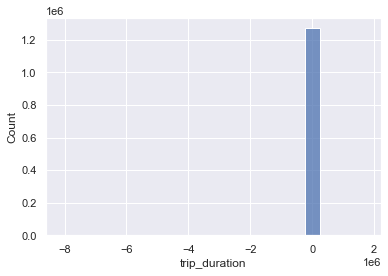

In [62]:
sns.histplot(data_yellow_cab['trip_duration'].astype('timedelta64[s]'),kde=False,bins=20)

<AxesSubplot:ylabel='Frequency'>

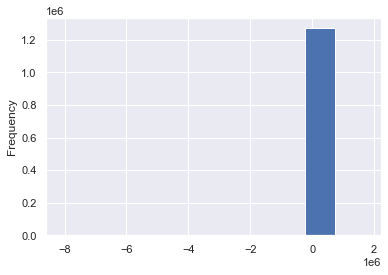

In [63]:
data_yellow_cab['trip_duration'].astype('timedelta64[s]').plot.hist()

<AxesSubplot:ylabel='Frequency'>

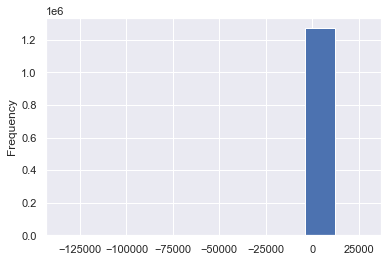

In [65]:
(data_yellow_cab['trip_duration'].astype('timedelta64[s]') / 60).plot.hist()

<AxesSubplot:ylabel='Frequency'>

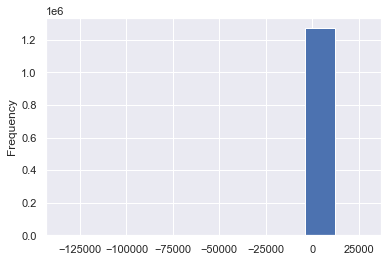

In [66]:
data_yellow_cab['trip_duration'].astype('timedelta64[m]').plot.hist()

<AxesSubplot:>

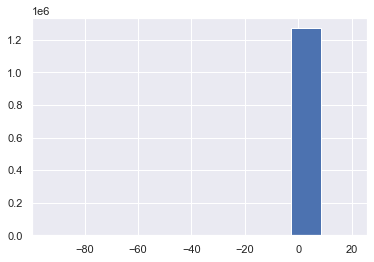

In [67]:
data_yellow_cab['trip_duration'].dt.days.hist()

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.27141e+06, 1.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-135084.63333333, -126889.51666667, -118694.4       ,
        -110499.28333333, -102304.16666667,  -94109.05      ,
         -85913.93333333,  -77718.81666667,  -69523.7       ,
         -61328.58333333,  -53133.46666667,  -44938.35      ,
         -36743.23333333,  -28548.11666667,  -20353.        ,
         -12157.88333333,   -3962.76666667,    4232.35      ,
          12427.46666667,   20622.58333333,   28817.7       ]),
 <BarContainer object of 20 artists>)

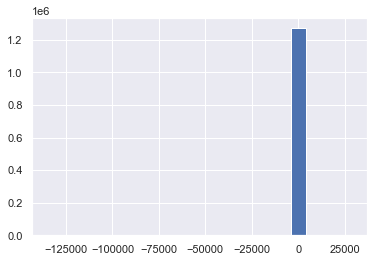

In [69]:
plt.hist(data_yellow_cab['trip_duration']/pd.Timedelta(minutes=1), bins=20)

We are getting really skewed histogram

In [71]:
data_yellow_cab['trip_duration'].sort_values(ascending=False)

302612      20 days 00:17:42
344032       3 days 01:39:07
591780       1 days 11:53:36
750652       1 days 08:19:27
601204       0 days 23:59:59
                 ...        
196436       0 days 00:00:00
1226560      0 days 00:00:00
1012072      0 days 00:00:00
151936     -1 days +23:55:47
556106    -94 days +04:35:22
Name: trip_duration, Length: 1271413, dtype: timedelta64[ns]

OUTLIER CAN BE EASILY VISIBLE

See we see alot of outlier we are not using this column anymore

In [ ]:
sns.distplot(data_yellow_cab['trip_duration'],kde=False)
plt.title('The distribution of of the pickup  Duration distribution')

The histogram (since data is huge kindly click after the ppt otherwise it will take some time)
display right skewness which is extreme proving the outlier 

In [ ]:
sns.boxplot(data_yellow_cab['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')

In [ ]:
print( data_yellow_cab['trip_duration'].nlargest(10))


# VENDOR ID 

<AxesSubplot:xlabel='VendorID', ylabel='count'>

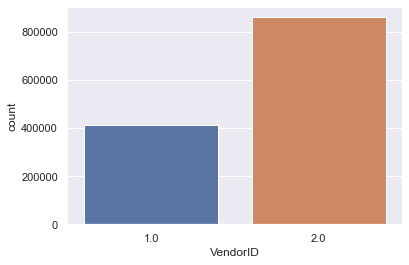

In [74]:
sns.countplot(x='VendorID',data=data_yellow_cab)

As we can see there is a difference of more than 200000 trips taken by both vendor

# Passenger Count

In [75]:
data_yellow_cab.passenger_count.value_counts()

1.0    966233
2.0    161670
3.0     43935
5.0     31089
0.0     26726
6.0     25362
4.0     16391
7.0         5
8.0         2
Name: passenger_count, dtype: int64

1. There are mny trips taken by single passengers compare to more than one passenger number 
2. There are only 5 trip taken by 7 passangers together and 2 trips taken by 8 passengers together 

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

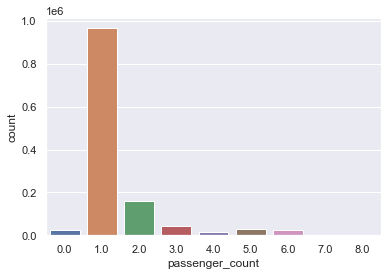

In [76]:
sns.countplot(x='passenger_count',data=data_yellow_cab)

There are some trip with 0 passanger which is an incorrect data or driver has purposely added it to complete a trip 
We see the highest amount of trips are with 1 passenger.
Let us remove the rows which have 0 or 7 or 8passenger count.

In [77]:
data_yellow_cab_new = data_yellow_cab[data_yellow_cab['passenger_count']!=0]

In [78]:
data_yellow_cab_new = data_yellow_cab[data_yellow_cab['passenger_count']<=6]

In [79]:
data_yellow_cab_new.passenger_count.value_counts()

1.0    966233
2.0    161670
3.0     43935
5.0     31089
0.0     26726
6.0     25362
4.0     16391
Name: passenger_count, dtype: int64

This looks like fair distribution.

# Store and Forward Flag

In [81]:
data_yellow_cab_new['store_and_fwd_flag'].value_counts(normalize=True)

N    0.985072
Y    0.014928
Name: store_and_fwd_flag, dtype: float64

We can observe that less than 1% of journeys were saved before being sent. The number of N flags is significantly higher. We'll see if they have anything to do with the trip's duration afterwards.

# Distance

In [82]:
data_yellow_cab_new['trip_distance'].value_counts()

0.80     22352
0.90     21813
1.00     21656
1.10     20877
0.70     20824
         ...  
24.45        1
38.41        1
47.45        1
24.04        1
25.92        1
Name: trip_distance, Length: 3570, dtype: int64

In order to find whether there are any trip with 0 kms we need to analysis the data
using bivariate analysis. There can be many reason for trips with 0 kms some are mentioned below:
    
    1. Since we dont any latitude and longitude it is possible that drop location was not idenitfied
    2. The driver in order to complete required number of ride must have purposely taken trip with 0kms
    3. The passenger cancelled the trip

# Trips by Day

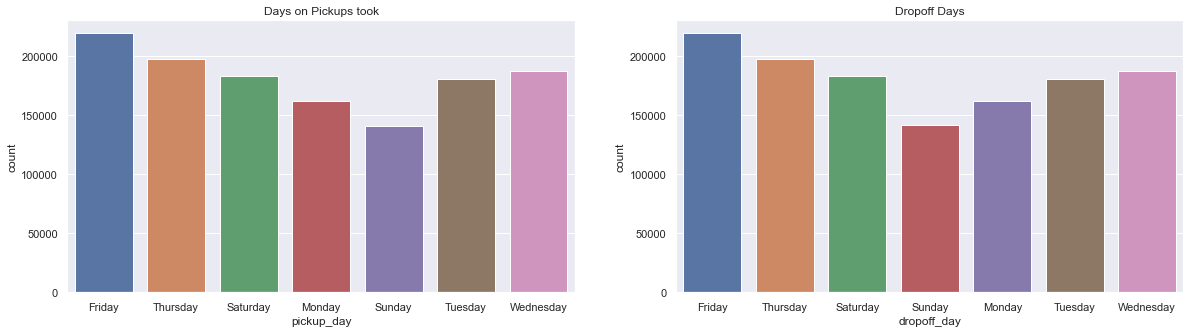

In [95]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Days on Pickups took')
ax=sns.countplot(x="pickup_day",data=data_yellow_cab_new,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data_yellow_cab_new,ax=ax2)

Seperating data below in different axis 

In [99]:
data_yellow_cab_new.dtypes

VendorID                         float64
tpep_pickup_datetime              object
tpep_dropoff_datetime             object
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
pickuptime                datetime64[ns]
droptime                  datetime64[ns]
difference_in_time       timedelta64[ns]
trip_duration            timedelta64[ns]
pickuptime_datetime       datetime64[ns]
droptime_datetime         datetime64[ns]
pickup_day      

In [88]:
data_yellow_cab_new['pickup_day'].value_counts()

Friday       219392
Thursday     197442
Wednesday    187551
Saturday     183202
Tuesday      180600
Monday       162110
Sunday       141109
Name: pickup_day, dtype: int64

In [89]:
data_yellow_cab_new['dropoff_day'].value_counts()

Friday       219149
Thursday     197261
Wednesday    187584
Saturday     183209
Tuesday      180548
Monday       162325
Sunday       141330
Name: dropoff_day, dtype: int64

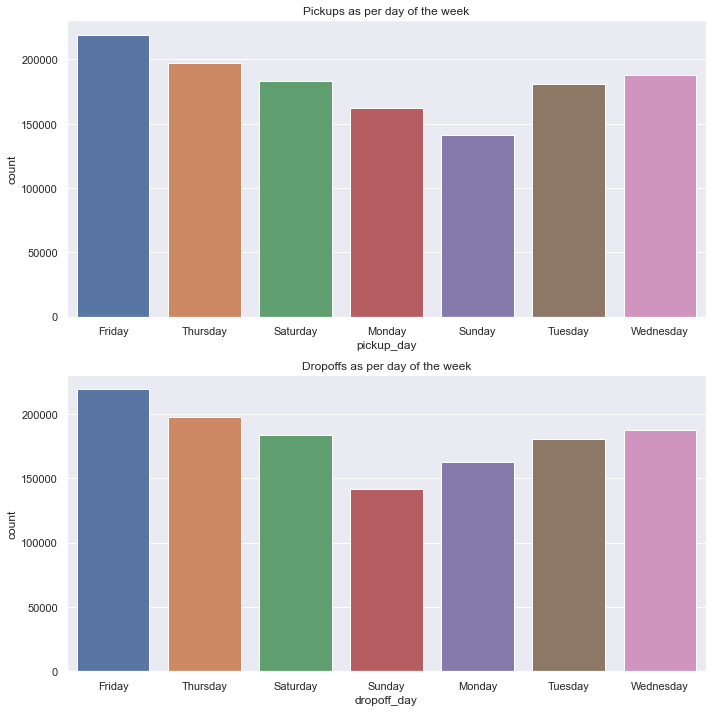

In [96]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=data_yellow_cab_new,ax=ax[0])
ax[0].set_title('Pickups as per day of the week')
sns.countplot(x='dropoff_day',data=data_yellow_cab_new,ax=ax[1])
ax[1].set_title('Dropoffs as per day of the week')
plt.tight_layout()

As we can see that the day Friday is the day where maximum pickup and dropoff took place. 
It is mostly likely because of being start of weekend

# Trips per Hour

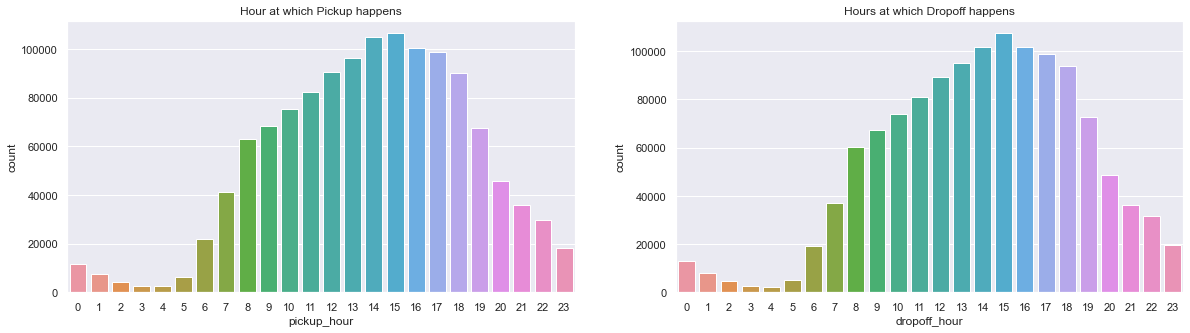

In [98]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Hour at which Pickup happens')
ax=sns.countplot(x="pickup_hour",data=data_yellow_cab_new,ax=ax9)
ax10.set_title('Hours at which Dropoff happens')
ax=sns.countplot(x="dropoff_hour",data=data_yellow_cab_new,ax=ax10)

Text(0.5, 1.0, 'Distribution of dropoff hours')

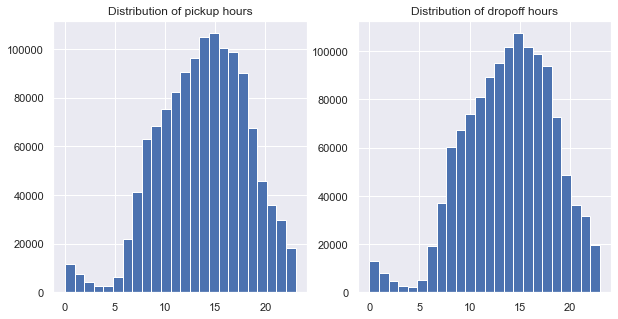

In [110]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
data_yellow_cab_new['pickup_hour_new']=data_yellow_cab_new['pickuptime_datetime'].dt.hour
data_yellow_cab_new.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')
data_yellow_cab_new['dropoff_hour_new']=data_yellow_cab_new['droptime_datetime'].dt.hour
data_yellow_cab_new.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

As we can see the busiest hours is between 9 am till 6 pm which is our office hours 

Since it is difficult to analysis time, hence we divide the time in 4 zones:
   
   1. morning (4 hrs to 10 hrs) 
   2. midday (10 hrs to 16 hrs)  
   3. evening (16 hrs to 22 hrs)  
   4. late night (22 hrs to 4 hrs)



# Trips per Time of Day

In [101]:
def zonaltime(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'
    
data_yellow_cab_new['pickup_zone']=data_yellow_cab_new['pickuptime_datetime'].apply(lambda x :zonaltime(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
data_yellow_cab_new['dropoff_zone']=data_yellow_cab_new['droptime_datetime'].apply(lambda x :zonaltime(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

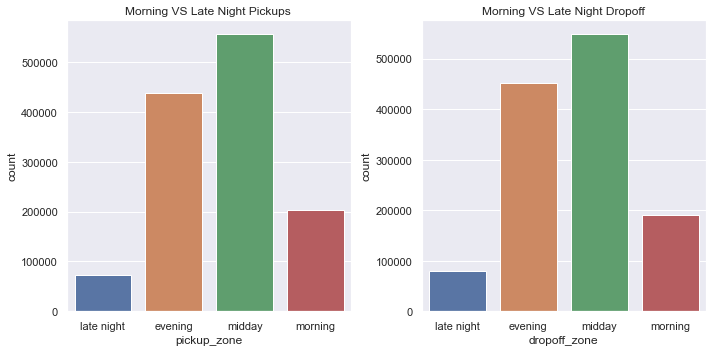

In [103]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
sns.countplot(x='pickup_zone',data=data_yellow_cab_new,ax=ax[0])
ax[0].set_title('Morning VS Late Night Pickups ')
sns.countplot(x='dropoff_zone',data=data_yellow_cab_new,ax=ax[1])
ax[1].set_title('Morning VS Late Night Dropoff')
plt.tight_layout()

In [104]:
data_yellow_cab_new['pickup_zone'].value_counts()

midday        556317
evening       438162
morning       203274
late night     73653
Name: pickup_zone, dtype: int64

In [105]:
data_yellow_cab_new['dropoff_zone'].value_counts()

midday        548316
evening       451686
morning       191471
late night     79933
Name: dropoff_zone, dtype: int64

As we can see the most pickup and dropoff occurs during middays

In [112]:
data_yellow_cab_new.dtypes

VendorID                         float64
tpep_pickup_datetime              object
tpep_dropoff_datetime             object
passenger_count                  float64
trip_distance                    float64
RatecodeID                       float64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                     float64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
pickuptime                datetime64[ns]
droptime                  datetime64[ns]
difference_in_time       timedelta64[ns]
trip_duration            timedelta64[ns]
pickuptime_datetime       datetime64[ns]
droptime_datetime         datetime64[ns]
pickup_day      

In [114]:
data_yellow_cab_new['payment_type'].value_counts()

1.0    934466
2.0    322889
3.0      8384
4.0      5667
Name: payment_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

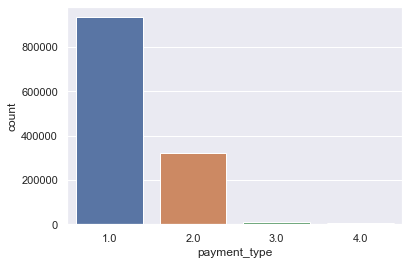

In [128]:
sns.countplot(x='payment_type',data=data_yellow_cab_new)

As we can see from the most common form of payment is credit card and there are no trip which is whose payment is unknown or voided

In [124]:
data_yellow_cab_new['fare_amount'].value_counts()

6.00      77551
5.50      76566
6.50      74263
5.00      72220
7.00      70966
          ...  
113.25        1
29.99         1
261.50        1
18.08         1
0.04          1
Name: fare_amount, Length: 1279, dtype: int64

In [130]:
import matplotlib.pyplot as plt
import numpy as np